# Challenge - Diabetes Classification
About Diabetes

Diabetes is a condition that impairs(weakens) the body's ability to process blood glucose, otherwise known as blood sugar. In the United States, the estimated number of people over 18 years of age with diagnosed and undiagnosed diabetes is 30.2 million. The figure represents between 27.9 and 32.7 percent of the population.

Without ongoing, careful management, diabetes can lead to a buildup of sugars in the blood, which can increase the risk of dangerous complications, including stroke and heart disease.

Different kinds of diabetes can occur, and managing the condition depends on the type. Not all forms of diabetes stem from a person being overweight or leading an inactive lifestyle. In fact, some are present from childhood.

In this problem you are given a Diabetes Data set consisting of following features -

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

and your task is to predict whether a person is suffering from diabetes or not (Binary Classification)

Tasks

1) Plot a bar graph showing number of classes and no of examples in each class.

2) Classification Task, classify a person as 0 or 1 (Diabetic or Not) using K-Nearest Neighbors classifier.


In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [325]:
# loading datasets
X = pd.read_csv('Datasets/Assignment4_Diabetes_XTrain.csv')
Y = pd.read_csv('Datasets/Assignment4_Diabetes_YTrain.csv')
test = pd.read_csv('Datasets/Assignment4_Diabetes_Xtest.csv')

In [326]:
# ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
X.shape 

(576, 8)

In [327]:
Y.shape

(576, 1)

In [328]:
Y.nunique() # 2 class problem

Outcome    2
dtype: int64

In [329]:
print(Y.values.flatten())

[1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 1 0 0 

In [330]:
# part 1) Plot a bar graph showing number of classes and no of examples in each class.
values, count = np.unique(Y,return_counts=True)

In [331]:
values

array([0, 1], dtype=int64)

In [332]:
count

array([375, 201])

Text(0, 0.5, 'Freuency')

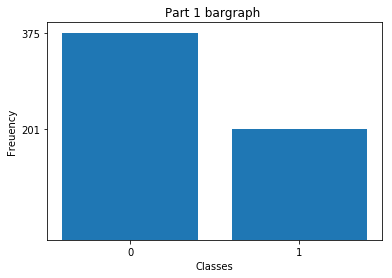

In [333]:
plt.bar(values,count)
plt.xticks([0,1])
plt.yticks(count)
plt.title('Part 1 bargraph ')
plt.xlabel('Classes')
plt.ylabel('Freuency')

In [334]:
Y.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [335]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

# part 2) Classification Task, classify a person as 0 or 1 (Diabetic or Not).

In [336]:
# using Knn code written from scratch

In [337]:
def distance(x1,x2):
    # x1 and x2 are both numpy arrays
    inside_part = np.sum((x1-x2)**2)
    return np.sqrt(inside_part)

In [338]:
def Knn(X, Y, querypoint, K=5) : 
    # X and Y are numpy arrays 
    Y = Y.flatten()
    distance_label_pair = []
    for i in range(X.shape[0]):
        dist = distance(querypoint, X[i])
        distance_label_pair.append((dist,Y[i]))
    
    # sorting dictionary based upon distance 
    distance_label_pair.sort() # sorting  will be done based on 1st values of pair of list
    
    # k-nearest
    k_nearest = distance_label_pair[:K]
    ans = []
    for dist,label in k_nearest :
        ans.append(label)
    
    values,counts = np.unique(ans, return_counts=True)
    
    max_index = np.argmax(counts)
    return values[max_index]
    
    

In [339]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state = 101)

In [340]:
# prediction over X_test
Y_pred = []
for query in X_test.values :
    Y_pred.append(Knn(X_train.values,Y_train.values, query , K=100))
Y_pred = np.array(Y_pred)

In [341]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [342]:
Y_test.values.flatten()

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [343]:
accuracy = np.sum(Y_pred == Y_test.values.flatten()) / Y_pred.shape[0]

In [344]:
accuracy


0.7222222222222222

In [345]:
# output

In [346]:
# prediction over test
output = []
for query in test.values :
    output.append(Knn(X_train.values,Y_train.values, query , K=100))
output = np.array(output)

In [347]:
output

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [348]:
df = pd.DataFrame(output,columns=['Outcome'])

In [349]:
df.head()

,Outcome
0,0
1,0
2,0
3,0
4,0


In [350]:
df.to_csv('Datasets/Assignment4_Diabetes_output_scratch.csv',index = False)

In [351]:
pd.read_csv('Datasets/Assignment4_Diabetes_output_scratch.csv').head() # got 70% accuracy when submitted

,Outcome
0,0
1,0
2,0
3,0
4,0


# part 2) Classification Task, classify a person as 0 or 1 (Diabetic or Not) using K-Nearest Neighbors classifier.

## Using Sklearn(sklearn.neighbors.KNeighborsClassifier)

In [352]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = pd.DataFrame(s.fit_transform(X))
test = pd.DataFrame(s.transform(test))

c:\users\shaurya singhal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\shaurya singhal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\shaurya singhal\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [353]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state = 101)

In [354]:
from sklearn.neighbors import KNeighborsClassifier

In [355]:
model = KNeighborsClassifier(n_neighbors=100)

In [356]:
X_train.shape

(432, 8)

In [357]:
Y_train.shape

(432, 1)

In [358]:
model.fit(X_train.values,Y_train.values.reshape(-1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [359]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 100,
 'p': 2,
 'weights': 'uniform'}

In [360]:
model.predict(test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [361]:
model.score(X_test,Y_test)

0.7361111111111112

In [362]:
# output
output = model.predict(test)
output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [363]:
type(output)

numpy.ndarray

In [364]:
df = pd.DataFrame(output,columns=['Outcome'])

In [365]:
df.head()

,Outcome
0,0
1,0
2,0
3,0
4,0


In [366]:
df.to_csv('Datasets/Assignment4_Diabetes_output.csv',index = False)

In [367]:
pd.read_csv('Datasets/Assignment4_Diabetes_output.csv').head()

,Outcome
0,0
1,0
2,0
3,0
4,0


## Thank You!